# Calidad de Vino

Importando

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus

In [24]:
# Cargar el conjunto de datos
data = pd.read_csv('calidad_de_vino.csv')

In [25]:
#Verificar la distribución de clases
clases = data['calidad'].value_counts()

In [26]:
# Eliminar las columnas que no se necesitan
columnas_a_eliminar = ['acidez fija', 'acidez volatil', 'dioxido de azufre libre', 'dioxido de azufre total', 'azucar residual']
data = data.drop(columnas_a_eliminar, axis=1)

In [27]:
# Explorar el dataset
print('Información en el dataset:')
print(data.info())

Información en el dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   botella_id     6497 non-null   int64  
 1   acido citrico  6497 non-null   float64
 2   cloruros       6497 non-null   float64
 3   densidad       6497 non-null   float64
 4   pH             6497 non-null   float64
 5   sulfatos       6497 non-null   float64
 6   alcohol        6497 non-null   float64
 7   color          6497 non-null   object 
 8   calidad        6497 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 456.9+ KB
None


In [28]:
print('Descripción general del dataset:')
print(data.describe())

Descripción general del dataset:
        botella_id  acido citrico     cloruros     densidad           pH  \
count  6497.000000    6497.000000  6497.000000  6497.000000  6497.000000   
mean   3248.000000       0.318633     0.056034     0.994697     3.218501   
std    1875.666681       0.145318     0.035034     0.002999     0.160787   
min       0.000000       0.000000     0.009000     0.987110     2.720000   
25%    1624.000000       0.250000     0.038000     0.992340     3.110000   
50%    3248.000000       0.310000     0.047000     0.994890     3.210000   
75%    4872.000000       0.390000     0.065000     0.996990     3.320000   
max    6496.000000       1.660000     0.611000     1.038980     4.010000   

          sulfatos      alcohol      calidad  
count  6497.000000  6497.000000  6497.000000  
mean      0.531268    10.491801     5.818378  
std       0.148806     1.192712     0.873255  
min       0.220000     8.000000     3.000000  
25%       0.430000     9.500000     5.000000  


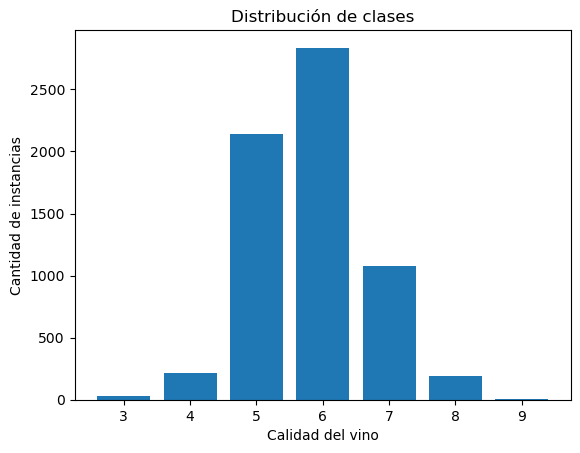

In [29]:
#Visualizar la distribución de clases en un gráfico de barras
plt.bar(clases.index, clases.values)
plt.xlabel('Calidad del vino')
plt.ylabel('Cantidad de instancias')
plt.title('Distribución de clases')
plt.show()

In [30]:
#Calcular la proporción de clases
proporcion_clases = clases / len(data)
print("Proporción de clases:")
print(proporcion_clases)

Proporción de clases:
6    0.436509
5    0.329075
7    0.166077
4    0.033246
8    0.029706
3    0.004618
9    0.000770
Name: calidad, dtype: float64


In [31]:
# Codificar las columnas categóricas como variables numéricas utilizando one-hot encoding
data = pd.get_dummies(data, columns=['color'])

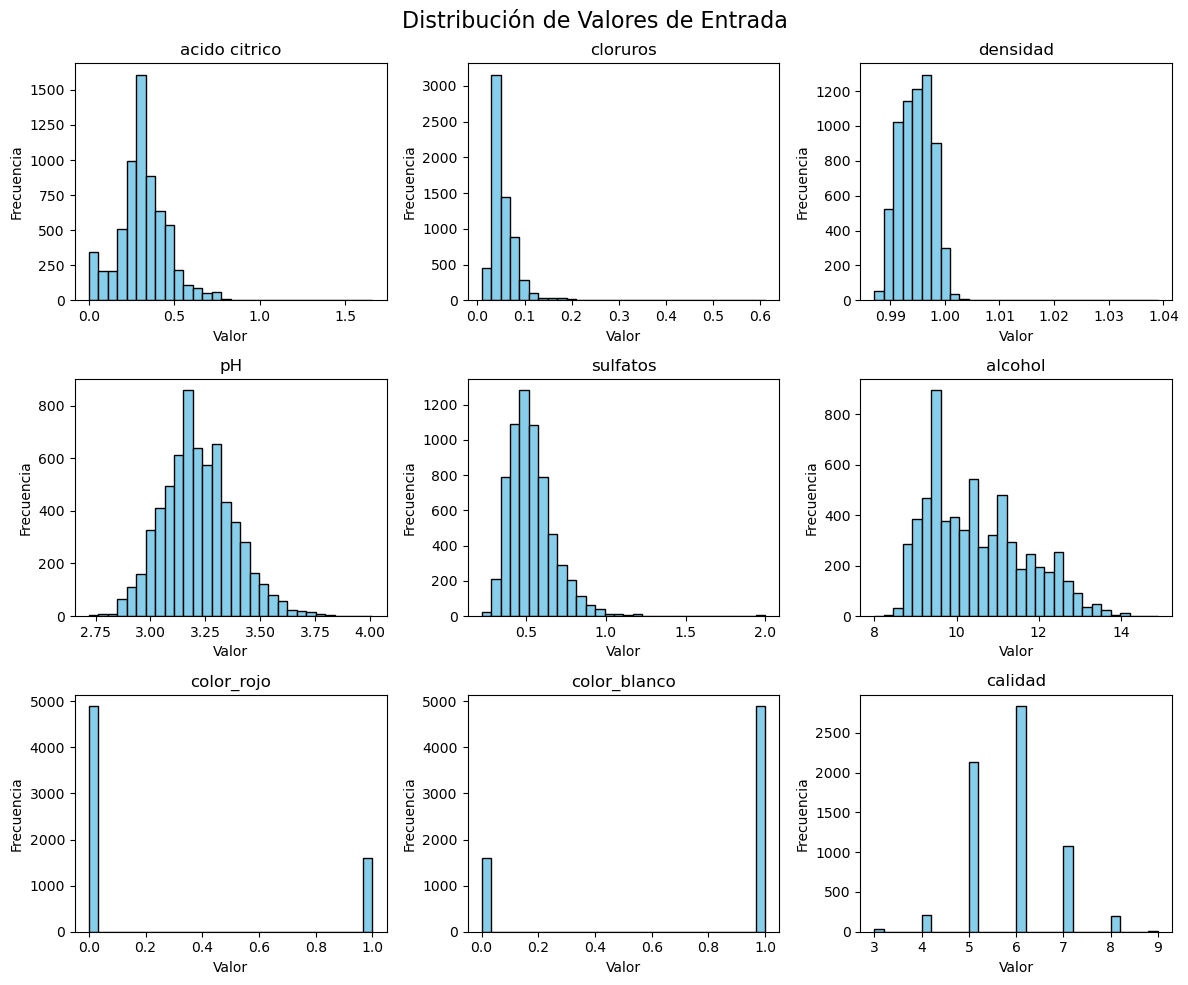

In [32]:
# Seleccionar las columnas para visualizar
columns_to_visualize = ['acido citrico', 'cloruros', 'densidad', 'pH', 'sulfatos', 'alcohol','color_rojo','color_blanco','calidad']

# Crear subplots para cada característica
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12, 10))
fig.suptitle('Distribución de Valores de Entrada', fontsize=16)

# Crear histogramas para cada característica
for i, column in enumerate(columns_to_visualize):
    ax = axes[i // 3, i % 3]
    ax.hist(data[column], bins=30, color='skyblue', edgecolor='black')
    ax.set_title(column)
    ax.set_xlabel('Valor')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


In [33]:
data.shape
data.head()

botella_id  acido citrico  cloruros  densidad    pH  sulfatos  alcohol  \
0           0           0.33     0.089   0.99720  3.28      0.73     11.8   
1           1           0.28     0.028   0.99182  3.34      0.46     11.4   
2           2           0.14     0.084   0.99810  3.14      0.56      9.7   
3           3           0.33     0.036   0.99521  3.34      0.52     10.2   
4           4           0.35     0.048   0.99146  3.05      0.56     11.1   

   calidad  color_blanco  color_rojo  
0        7             0           1  
1        5             1           0  
2        5             0           1  
3        6             1           0  
4        6             1           0

In [34]:
data.groupby('calidad').size()

calidad
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

In [35]:
# Dividir los datos en características (X) y variable objetivo (y)
# Preparar los datos
X = data.drop('calidad', axis=1)
y = data['calidad']

In [36]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
# Crear el árbol de decisiones
algoritmo = DecisionTreeClassifier(criterion="entropy")

In [44]:
# Entrenar el modelo
algoritmo.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [45]:
# Realizar una predicción
y_pred = algoritmo.predict(X_test)

In [46]:
# Evaluar el modelo
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  0   0   7   2   2   1]
 [  1   6  16  18   5   0]
 [  3   7 234 143  22   0]
 [  0  23 131 349  67  10]
 [  0   6  21  74 107  10]
 [  0   0   2  12   6  15]]


In [48]:
# Calcular la exactitud del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(accuracy)

Exactitud del modelo:
0.546923076923077


In [49]:
# Calcular la precisión del modelo
precision = precision_score(y_test, y_pred, average='weighted')
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5416297804256611


In [50]:
# Calcular el Exhaustividad del modelo
recall_score = recall_score(y_test, y_pred, average='weighted')
print('Exhaustividad del modelo:')
print(recall_score)

Exhaustividad del modelo:
0.546923076923077


In [51]:
# Calcular el F1-score del modelo
f1_score = f1_score(y_test, y_pred, average='weighted')
print('F1 del modelo:')
print(f1_score)

F1 del modelo:
0.5441640229832636


In [44]:
# Convertir los valores de la variable objetivo y a cadenas (str)
y_str = y.astype(str)

# Crear una representación gráfica del árbol de decisiones
dot_data = export_graphviz(modelo_arbol, out_file=None, 
                           feature_names=X.columns, class_names=y_str.unique(),
                           filled=True, rounded=True, special_characters=True)
grafico_arbol = graphviz.Source(dot_data)

# Mostrar el gráfico en Jupyter Notebook
grafico_arbol


(process:21632): GLib-GIO-WARNING **: 04:20:47.778: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:21632): GLib-GIO-WARNING **: 04:20:47.815: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs


In [45]:
# Guardar el gráfico como imagen
grafico_arbol.format = 'png'
grafico_arbol.render('arbol_decisiones', view=True)  # Se generará un archivo 'arbol_decisiones.png'


(process:8496): GLib-GIO-WARNING **: 04:21:03.665: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2303.17.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:8496): GLib-GIO-WARNING **: 04:21:03.688: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.6.2.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.253892 to fit


'arbol_decisiones.png'